# Desafio 02 - Hackarteris (Equipe 030)

**Contexto:** O problema relacionado a atividade humana no processo de fiscalização das sinalizações verticais, nesse sentido, a necessidade dos colaboradores de ir fiscalizar presencialmente as placas, tendo que muitas vezes voltar mais vezes caso aquela placa necessite manutenção. Dessa forma, buscamos resolver o problema do processo, reduzindo custos e deslocamento humano resolvendo o problema do colaborador saber se necessita levar equipamentos ou uma equipe para a manutenção, por ter uma probabilidade alta de necessitar de manutenção, ou não.

**Condições do Projeto:**

1. Foi consumido o API `https://openweathermap.org/` (API da OpenWeather) para obter os dados climáticos da localização de cada placa.
2. A requisição da API OpenWeather foi realizado dentro da estrutura de repetição a cada 60 segundos (1 minuto) para que não haja risco de exceder o limite de requisições por minuto na API.
3. Depois de obter os dados do clima do local da placa. É feito o cálculo da probabilidade de troca (1) ou não troca (0) da placa, utilizando como modelo de predição a regressão logística binária de aprendizado de máquina supervisionado. Esse modelo de previsão probabilística foi calculado usando um banco de dados modelo elaborado pela equipe, podendo ser retreinado com dados reais posteriormente.
4. Uma vez que ao modelo retorna se será necessário a troca ou não da placa, o time de colaboradores já planejam juntamente com o monitoramento, a manutenção das placas fora de esepecificação de uso.



In [ ]:
# Substituir o texto KEY por sua API Key da OpenWeather, ela será salva como uma variável de ambiente.
# Foi alterado o link para requisição da API OpenWeather para puxar informações baseado na Cidade. Também foi configurado para que os valores retornassem em pt-br

openweather_api_key = "40b231713070f3cc561ca3940edbf766"


## **E**xtract

Extraído a lista de Cidades a partir do arquivo CSV. Para cada cidade, foi feito uma requisição GET para obter os dados de clima da cidade correspondente.

In [ ]:
pip install ipywidgets pandas openpyxl

In [ ]:
# Criar a Planilha de dados de monitoramento das placas
from IPython.core.display import display, Markdown, clear_output
import ipywidgets as widgets
import openpyxl

# dados
id_placa = widgets.Text(description="id_placa")
pelicula_tipo = widgets.Text(description="pelicula_tipo")
cor_placa = widgets.Text(description="cor_placa")
lon = widgets.FloatText(description="lon")
lat = widgets.FloatText(description="lat")
retroreflet_mean = widgets.FloatText(description="retroreflet_mean")
retroreflet_min = widgets.FloatText(description="retroreflet_min")

# Botão de salvar no Excel
save_button = widgets.Button(description="Save to Excel")

# Função para salvar
def save_to_excel(_):
    data = [
        id_placa.value,
        pelicula_tipo.value,
        cor_placa.value,
        lon.value,
        lat.value,
        retroreflet_mean.value,
        retroreflet_min.value,
        "(Not Inputable)",
        "(Not Inputable)",
        "(Not Inputable)",
        "(Not Inputable)"
    ]

    try:
        # Carregar o arquivo Excel
        book = openpyxl.load_workbook("data.xlsx")
        writer = book.active

        # Encontre a próxima linha vazia
        next_row = writer.max_row + 1

        # Preencha as células na próxima linha
        for col, value in enumerate(data, start=1):
            cell = writer.cell(row=next_row, column=col)
            cell.value = value

        # Salvar o arquivo Excel
        book.save("data.xlsx")

    except FileNotFoundError:
        # Se o arquivo não existir, crie um novo
        book = openpyxl.Workbook()
        writer = book.active

        # Cabeçalhos
        headers = [
            "id_placa",
            "pelicula_tipo",
            "cor_placa",
            "lon",
            "lat",
            "retroreflet_mean",
            "retroreflet_min",
            "temp_max",
            "temp_min",
            "chuva_mm",
            "troca_placa"
        ]

        # Preencher cabeçalhos
        for col, header in enumerate(headers, start=1):
            cell = writer.cell(row=1, column=col)
            cell.value = header

        # Preencher os dados na primeira linha
        for col, value in enumerate(data, start=1):
            cell = writer.cell(row=2, column=col)
            cell.value = value

        # Salvar o arquivo Excel
        book.save("data.xlsx")

    # Janela
    id_placa.value = ""
    pelicula_tipo.value = ""
    cor_placa.value = ""
    lon.value = 0.0
    lat.value = 0.0
    retroreflet_mean.value = 0.0
    retroreflet_min.value = 0.0

    # Mensagem de sucesso
    display(Markdown("Data saved to Excel!"))

save_button.on_click(save_to_excel)

# Criar um formulário e botão de salvar
form = widgets.VBox([id_placa, pelicula_tipo, cor_placa, lon, lat, retroreflet_mean, retroreflet_min, save_button])

display(form)

Data saved to Excel!

In [ ]:
#Integração da base de dados de monitoramento com a API openWeather
import pandas as pd

df = pd.read_excel('data.xlsx')
lat = df['lat'].tolist()
lon = df['lon'].tolist()
print(lat)
print(lon)

[-22.870024, -23.4093072]
[-43.701432, -46.8101988]


In [ ]:
from numpy.lib.function_base import append
import requests
import json
import time

def get_previsao(lat, lon):
  response = requests.get(f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={openweather_api_key}")
  return response.json() if response.status_code == 200 else None

temp_maxima = []
temp_minima = []
chuva = []

for i in range(len(lat)):
  print(lat[i], lon[i])
  previsoes = get_previsao(lat[i], lon[i])
  data_temp_max = previsoes['main']['temp_max'] - 273.15
  data_temp_min = previsoes['main']['temp_min'] - 273.15
  temp_maxima.append(data_temp_max)
  temp_minima.append(data_temp_min)

  if 'rain' in previsoes:
    chuva = previsoes['rain']['1h']
  else:
    chuva = 0.0
  print(f"{temp_maxima[i]:.1f} °C")
  print(f"{temp_minima[i]:.1f} °C")
  print(chuva)
  print(previsoes)
  #time.sleep(60)

-22.870024 -43.701432
24.0 °C
23.9 °C
1.33
{'coord': {'lon': -43.7014, 'lat': -22.87}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 297.01, 'feels_like': 298.04, 'temp_min': 297.01, 'temp_max': 297.16, 'pressure': 1013, 'humidity': 99, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 734, 'wind': {'speed': 1.1, 'deg': 3, 'gust': 1.62}, 'rain': {'1h': 1.33}, 'clouds': {'all': 100}, 'dt': 1698631604, 'sys': {'type': 2, 'id': 2037107, 'country': 'BR', 'sunrise': 1698567100, 'sunset': 1698613513}, 'timezone': -10800, 'id': 7537426, 'name': 'Loteamento São Miguel', 'cod': 200}
-23.4093072 -46.8101988
22.3 °C
21.0 °C
0.0
{'coord': {'lon': -46.8102, 'lat': -23.4093}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 294.45, 'feels_like': 295.22, 'temp_min': 294.15, 'temp_max': 295.42, 'pressure': 1013, 'humidity': 99, 'sea_level'

## **L**oad

Atualizar a lista de temperatura máxima (temp_max), temperatura mínima (temp_min) e precipitação de chuva (chuva_mm).

In [ ]:
# Carrega o arquivo Excel
workbook = openpyxl.load_workbook('data.xlsx')

# Acessa a planilha desejada
sheet = workbook.active

# Lista com os novos valores
novos_temp_max = temp_maxima
novos_temp_min = temp_minima
novos_chuva = chuva

# Atualizar colunas
temp_max_atualizar = 8
temp_min_atualizar = 9
chuva_atualizar = 10

# Atualize as células com os novos valores de temperatura máxima
for linha, novo_valor in enumerate(novos_temp_max, start=2):
    celula = sheet.cell(row = linha, column = temp_max_atualizar)
    celula.value = novo_valor
# Atualize as células com os novos valores de temperatura mínima
for linha, novo_valor in enumerate(novos_temp_max, start=2):
    celula = sheet.cell(row = linha, column = temp_min_atualizar)
    celula.value = novo_valor
# Atualize as células com os novos valores de precipitação de chuva
for linha, novo_valor in enumerate(novos_temp_max, start=2):
    celula = sheet.cell(row = linha, column = chuva_atualizar)
    celula.value = novo_valor

# Salve o arquivo Excel atualizado
workbook.save('data.xlsx')

## **T**ransform

Criar o modelo logístico binário de predição de troca da placa utilizando uma base de dados com o histórico das últimas medições realizadas.
Nesse exemplo criamos uma base de dados com poucas amostras e com informações arbitrárias para treinar o modelo.

In [ ]:
# Criando do modelo de Regressão Logística
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# Lendo e visualizando o banco de dados pra criar o modelo
df = pd.read_excel('placas_db_modelo.xlsx')
df.tail()

,id_placa,pelicula_tipo,cor_placa,lon,lat,retroreflet_mean,retroreflet_min,temp_max,temp_min,chuva_mm,troca_placa
35,36,III,Azul,NaN,NaN,145,24,32,26,0.122090,0
36,37,III,Amarela,NaN,NaN,217,216,30,25,2.623515,1
37,38,III,Azul,NaN,NaN,89,24,26,22,2.011206,0
38,39,III,Branca,NaN,NaN,302,288,28,24,2.112309,1
39,40,III,Vermelha,NaN,NaN,110,52,26,17,2.149923,0


In [ ]:
# Definindo as variáveis independentes (X) e a variável target (y)
X = df[['retroreflet_min','retroreflet_mean','temp_max','chuva_mm']]
y = df['troca_placa']

In [ ]:
# Separando a amostra em 75% treino e 25% teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Treinando o modelo e testando
modelo_reglog = LogisticRegression()
modelo_reglog.fit(X_treino, y_treino)
y_pred = modelo_reglog.predict(X_teste)

<Axes: xlabel='Predito', ylabel='Real'>

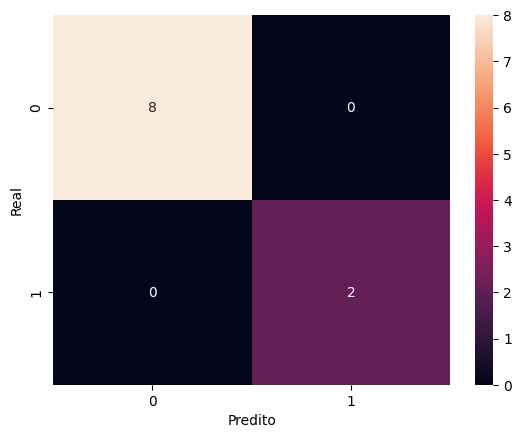

In [ ]:
# Validando o modelo com cross validation (matriz de confusão)
matriz_confusao = pd.crosstab(y_teste, y_pred, rownames = ['Real'], colnames = ['Predito'])
sn.heatmap(matriz_confusao, annot = True)

In [ ]:
# Mostrar a acurácia do modelo (acertos)
print('Acurácia: ', metrics.accuracy_score(y_teste, y_pred))
plt.show()

Acurácia:  1.0


Fazer a predição de troca da película com os dados inputados no banco de dados.

In [ ]:
data_frame = pd.read_excel('data.xlsx')
print(data_frame)
X_pred = data_frame[['retroreflet_min','retroreflet_mean','temp_max','chuva_mm']]

resultado = modelo_reglog.predict(X_pred)
print(resultado)

resultados = resultado.tolist()
print(resultados)

   id_placa pelicula_tipo cor_placa        lon        lat  retroreflet_mean  \
0         1           III   Amarela -43.701432 -22.870024               771   
1         2           III   Amarela -46.810199 -23.409307               700   

   retroreflet_min  temp_max  temp_min  chuva_mm      troca_placa  
0              216     24.01     24.01     24.01  (Not Inputable)  
1              216     22.27     22.27     22.27  (Not Inputable)  
[0 0]
[0, 0]


In [ ]:
# Atualizar resultado da troca ou não da placa
workbook = openpyxl.load_workbook('data.xlsx')
sheet = workbook.active

novos_resultados = resultados

troca_atualizar = 11

for linha, novo_valor in enumerate(novos_resultados, start=2):
    celula = sheet.cell(row = linha, column = troca_atualizar)
    celula.value = novo_valor

workbook.save('data.xlsx')